# Lesson 8 Assignment - Neural Networks
Version: August-2020

## Author - Priya Asokan

## Instructions

Use all the features in the dataset, allowing Keras to decide the weights of the network. To review the data attributes, download the L08_WineQuality.pdfLinks to an external site..  Perform each of the following tasks and answer the related questions:

1. Use the provided RedWhiteWine.csv file. Include ALL the features with “Class” being your output vector
2. Be able to adjust the following between experiments:
 - Learning Rate
 - Number of epochs
 - Depth of architecture—number of hidden layers between the input and output layers
 - Number of nodes in a hidden layer—width of the hidden layers (optional) Momentum
3. Determine the best neural network structure and hyperparameter settings that result in the best predictive capability

## Summary

1. Built a neural network structure using TensorFlow and keras with hyper parameter settings to better predict RedWhiteWine.
2. To train this neural networks model I have used stochastic gradient descent, tweaking weights iteratively to minimize the cost function.
3. I have used 4 hidden layers. 
    - First hidden layer with 8 neurons
    - Second hidden layer with 16 neurons
    - Third hidden layer with 32 neurons
    - Forth hidden layer with 64 neurons
4. I tweaked a few paramters and tried to get the best accuracy score for RedWhiteWine classification predictions.
    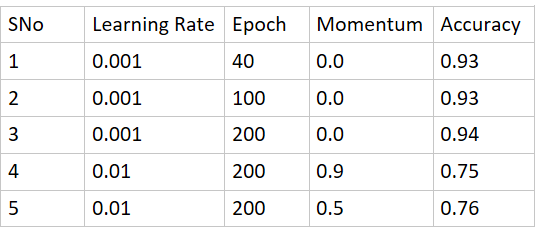
 ##### The best model with Learning rate - 0.001, Epoch- 200, Momentum - 0.0 gives an accuracy of 0.94 in test set.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [2]:
SEED = 1000

In [3]:
# Read Data
wine_df = pd.read_csv("https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/RedWhiteWine.csv")
print(wine_df.head())
print(wine_df.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Class  
0      9.4        5      1  
1      9.8        5      1  

## Prepare Data

In [4]:
# Check for null values
print(wine_df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Class                   0
dtype: int64


In [5]:
# Check for the data types
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Class                     int64
dtype: object

## EDA


In [6]:
# Get correlation for all numeric features
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


In [7]:
# Correlation for target column
wine_df.corr().loc[:,['Class']]

,Class
fixed acidity,0.486740
volatile acidity,0.653036
citric acid,-0.187397
residual sugar,-0.348821
chlorides,0.512678
free sulfur dioxide,-0.471644
total sulfur dioxide,-0.700357
density,0.390645
pH,0.329129
sulphates,0.487218


## Data Split


In [8]:
# Seperate train, tune & test set
wine_df_train, wine_df_tune_test = train_test_split(wine_df,
                                    test_size = 0.3,
                                    random_state = SEED,
                                    shuffle = True,
                                    stratify = None)

In [9]:
# Seperate data into train,tune and test set
wine_df_tune, wine_df_test = train_test_split(wine_df_tune_test,
                                    test_size = 0.5,
                                    random_state = SEED,
                                    shuffle = True,
                                    stratify = None)

In [10]:
# Check data split count
print(wine_df_train.shape)
print(wine_df_tune.shape)
print(wine_df_test.shape)

(4547, 13)
(975, 13)
(975, 13)


In [11]:
# Check the count of values in each class
print(wine_df['Class'].value_counts())

0    4898
1    1599
Name: Class, dtype: int64


In [12]:
# scale numeric features
sc = StandardScaler()
sc.fit(wine_df_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
# Set y target to train , tune and test set
y_train = wine_df_train["Class"].to_numpy()
y_tune = wine_df_tune["Class"].to_numpy()
y_test = wine_df_test["Class"].to_numpy()

In [14]:
# Drop the target column
wine_df_train = wine_df_train.drop(['Class'],axis = 1)
wine_df_tune = wine_df_tune.drop(['Class'],axis = 1)
wine_df_test = wine_df_test.drop(['Class'],axis = 1)

In [15]:
# feature matrix
X_train = wine_df_train.to_numpy()
X_tune = wine_df_tune.to_numpy()
X_test = wine_df_test.to_numpy()

## Training  a Classifier using Neural Networks with Keras

In [16]:
# Train Neural Networks classifier with Keras
wine_model = keras.Sequential([
    keras.layers.Dense(8, input_dim=X_train.shape[1], activation="relu"), # first hidden layer
    keras.layers.Dense(16, activation="relu"),# Second Hidden layer
    keras.layers.Dense(32, activation="relu"),# Third hidden layer 
    keras.layers.Dense(64, activation="relu"),# Fourth hidden layer 
    keras.layers.Dense(1, activation="sigmoid") # output layer 
])

In [17]:
# summary of model object
wine_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 2,969
Trainable params: 2,969
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [18]:
# Compile model using Stochastic Gradient Descent
wine_model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0), 
              loss="binary_crossentropy",
              metrics=["accuracy"])

## Train the model

In [19]:
# Fit model
history = wine_model.fit(X_train, 
                    y_train, 
                    batch_size=16,
                    epochs=200,
                    verbose=1,                    
                    validation_data=(X_tune, y_tune)
)

Train on 4547 samples, validate on 975 samples
Epoch 1/200
4547/4547 [==============================] - 1s 205us/sample - loss: 0.3523 - accuracy: 0.8520 - val_loss: 0.2772 - val_accuracy: 0.8964
Epoch 2/200
4547/4547 [==============================] - 0s 80us/sample - loss: 0.2683 - accuracy: 0.9079 - val_loss: 0.2486 - val_accuracy: 0.9108
Epoch 3/200
4547/4547 [==============================] - 0s 76us/sample - loss: 0.2445 - accuracy: 0.9122 - val_loss: 0.2480 - val_accuracy: 0.9015
Epoch 4/200
4547/4547 [==============================] - 0s 74us/sample - loss: 0.2371 - accuracy: 0.9140 - val_loss: 0.2284 - val_accuracy: 0.9210
Epoch 5/200
4547/4547 [==============================] - 0s 76us/sample - loss: 0.2295 - accuracy: 0.9213 - val_loss: 0.2373 - val_accuracy: 0.9159
Epoch 6/200
4547/4547 [==============================] - 0s 74us/sample - loss: 0.2228 - accuracy: 0.9241 - val_loss: 0.2230 - val_accuracy: 0.9200
Epoch 7/200
4547/4547 [==============================] - 0s 74us

Epoch 56/200
4547/4547 [==============================] - 0s 75us/sample - loss: 0.1503 - accuracy: 0.9459 - val_loss: 2.3557 - val_accuracy: 0.2523
Epoch 57/200
4547/4547 [==============================] - 0s 75us/sample - loss: 0.1741 - accuracy: 0.9426 - val_loss: 0.1359 - val_accuracy: 0.9538
Epoch 58/200
4547/4547 [==============================] - 0s 76us/sample - loss: 0.1552 - accuracy: 0.9426 - val_loss: 0.1422 - val_accuracy: 0.9477
Epoch 59/200
4547/4547 [==============================] - 0s 75us/sample - loss: 0.1506 - accuracy: 0.9448 - val_loss: 0.1818 - val_accuracy: 0.9374
Epoch 60/200
4547/4547 [==============================] - 0s 74us/sample - loss: 0.1496 - accuracy: 0.9463 - val_loss: 0.1659 - val_accuracy: 0.9405
Epoch 61/200
4547/4547 [==============================] - 0s 74us/sample - loss: 0.1564 - accuracy: 0.9433 - val_loss: 0.2081 - val_accuracy: 0.9303
Epoch 62/200
4547/4547 [==============================] - 0s 75us/sample - loss: 0.1528 - accuracy: 0.9457

Epoch 111/200
4547/4547 [==============================] - 1s 126us/sample - loss: 0.1397 - accuracy: 0.9496 - val_loss: 0.3883 - val_accuracy: 0.8421
Epoch 112/200
4547/4547 [==============================] - 1s 136us/sample - loss: 0.1390 - accuracy: 0.9516 - val_loss: 0.1314 - val_accuracy: 0.9569
Epoch 113/200
4547/4547 [==============================] - 1s 144us/sample - loss: 0.1368 - accuracy: 0.9499 - val_loss: 0.1266 - val_accuracy: 0.9590
Epoch 114/200
4547/4547 [==============================] - 1s 134us/sample - loss: 0.1392 - accuracy: 0.9516 - val_loss: 0.1264 - val_accuracy: 0.9549
Epoch 115/200
4547/4547 [==============================] - 1s 149us/sample - loss: 0.1371 - accuracy: 0.9516 - val_loss: 0.1569 - val_accuracy: 0.9446
Epoch 116/200
4547/4547 [==============================] - 1s 125us/sample - loss: 0.1343 - accuracy: 0.9496 - val_loss: 0.1320 - val_accuracy: 0.9508
Epoch 117/200
4547/4547 [==============================] - 1s 148us/sample - loss: 0.1406 - ac

## Examine the Trained Model

In [20]:
# get model layers
wine_model.layers

In [21]:
# name of each model layer
print(wine_model.layers[0].name)
print(wine_model.layers[1].name)
print(wine_model.layers[2].name)
print(wine_model.layers[3].name)

dense
dense_1
dense_2
dense_3


In [22]:
# you can examine weights and biaes in each layer
weights, biases = wine_model.layers[0].get_weights()

In [23]:
# output weights abd biases
print(weights.shape)
print(biases.shape)
print(weights)
print(biases)

(12, 8)
(8,)
[[ 0.2955759   0.5393931  -0.35717398 -0.6393017  -0.10107793  0.17956668
  -0.34518728 -0.74566346]
 [-0.42018667  0.4207476  -0.4151675  -0.31742764 -0.5805018  -0.25610647
  -0.32465458 -0.74875355]
 [ 0.4454512  -0.2529347   0.20248806  0.0213411   0.07032144  0.35974836
   0.0634939   0.52363455]
 [-0.2306989   0.40221438  0.33656442  0.33152544  0.24879862 -0.17553745
  -0.2697752   0.15928462]
 [-0.12725039 -0.11512329  0.35629332 -0.28529036  0.46743724 -0.5070797
   0.5585708  -0.05049148]
 [ 0.55279     0.35084414  0.10202652 -0.09352948  0.08412395  0.11741222
  -0.5740248   0.09290739]
 [-0.42340213  0.1559675  -0.34889084  0.18445227  0.08142512 -0.47469148
   0.23020208  0.07281785]
 [ 0.07385484  0.43992433  0.2117967   0.41155457  0.49254802  0.33434144
  -0.32971686 -0.45314583]
 [ 0.2447072   0.02778906 -0.40048313 -0.44479322  0.21638866  0.30447745
   0.5275148  -0.8807752 ]
 [ 0.1979228   0.35289955  0.23152113 -0.3645747  -0.49738657  0.35614768
  -0.

## Model Performance Evaluation

In [24]:
# Model parameters
history.params

{'batch_size': 16,
 'epochs': 200,
 'steps': 285,
 'samples': 4547,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [25]:
print(history.epoch)# predict
y_tune_prob = wine_model.predict(X_tune)
y_tune_pred = (wine_model.predict(X_tune) >= 0.5).astype("int32")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


In [26]:
# Dictionary with loss, accuracy values
history_dict = history.history
history_dict

{'loss': [0.35230877657290055,
  0.26829565945485934,
  0.24448587270160677,
  0.237057307188827,
  0.22948197924765698,
  0.2227968255785866,
  0.21758529404516216,
  0.21628403044870023,
  0.2119027757994652,
  0.21028247435479105,
  0.2038221345062908,
  0.2002667162232699,
  0.1968873568577231,
  0.19401563164760235,
  0.19392517926992756,
  0.1914495720604055,
  0.18901602366919934,
  0.1863932644570263,
  0.18605683968601736,
  0.1853961127248765,
  0.1853856719163504,
  0.1835685493205376,
  0.1818009419757926,
  0.18438748340567887,
  0.17928687902054788,
  0.18008439093729886,
  0.1776918982314767,
  0.1732877103604863,
  0.17148118300648327,
  0.1734187770775192,
  0.17232737796676467,
  0.17074142531795974,
  0.1703155065057355,
  0.17111335167825575,
  0.16823774763844435,
  0.16601625577759055,
  0.16763574462232417,
  0.16770217153287756,
  0.1609753857157618,
  0.15982282381444965,
  0.15847044955092732,
  0.16284879008301908,
  0.1574081346683068,
  0.1587895174093556,


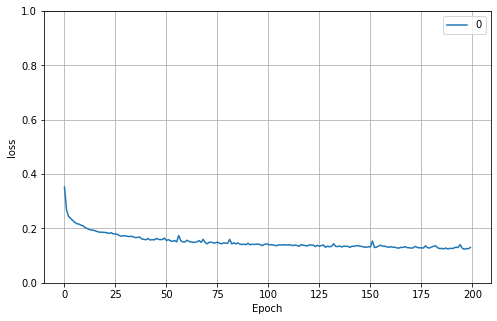

In [27]:
# Plot to see how the loss function converges
pd.DataFrame(history.history['loss']).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

## Prediction With trained Model

In [28]:
# output
loss_tune, acc_tune = wine_model.evaluate(X_tune, y_tune)

print("Tune set accuracy:", acc_tune)

975/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Tune set accuracy: 0.95179486


In [29]:
# predict
y_tune_prob = wine_model.predict(X_tune)
y_tune_pred = (wine_model.predict(X_tune) >= 0.5).astype("int32")

In [30]:
print(y_tune_prob[:10])
print(y_tune_pred[:10])

[[2.2864342e-04]
 [2.8483272e-03]
 [1.8143058e-02]
 [5.4990649e-03]
 [2.0556557e-01]
 [1.4921674e-01]
 [1.5188366e-02]
 [5.4402351e-03]
 [1.4936864e-02]
 [9.9671972e-01]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [31]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
print(cm)

[[724   8]
 [ 39 204]]


In [32]:
# calculate accuracy 
accuracy_score(y_true=y_tune, y_pred=y_tune_pred)

0.9517948717948718

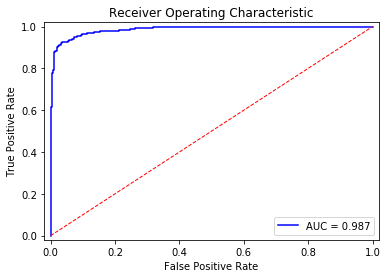

In [33]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_tune, y_score=y_tune_prob)
roc_auc = roc_auc_score(y_true=y_tune, y_score=y_tune_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

## Save the Model

In [34]:
# save model
wine_model.save("wine_model.h5")

## Model Performance in Test Set

In [35]:
# load saved model
wine_model_saved = keras.models.load_model("wine_model.h5")

In [36]:
# predict
y_test_prob = wine_model_saved.predict(X_test)
y_test_pred = (wine_model_saved.predict(X_test) >= 0.5).astype("int32")

In [37]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[719   7]
 [ 46 203]]


In [38]:
# calculate accuracy
print(accuracy_score(y_true=y_test, y_pred=y_test_pred))

0.9456410256410256


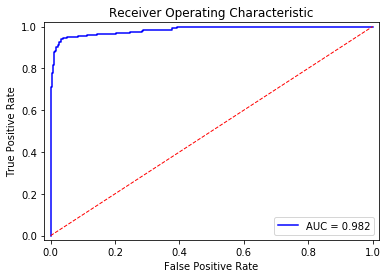

In [39]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

#### Test Set accuracy score- 0.94